In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

mesasurement_attrs = vars(measurement)
station_attrs = vars(station)

for attr in mesasurement_attrs.items():
    print(attr)

for attr in station_attrs.items():
    print(attr)


('__table__', Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None))
('__module__', 'sqlalchemy.ext.automap')
('__doc__', None)
('_sa_class_manager', <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 210df4be690>)
('__init__', <function __init__ at 0x00000210DF4CFE20>)
('id', <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x00000210DF4BD670>)
('station', <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x00000210DF4BE6F0>)
('date', <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x00000210DF4BE930>)
('prcp', <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x00000210DF4BEAB0>)
('tobs', <sqlalchemy.orm.attributes.InstrumentedAttribute object at 0x00000210DF4BEBD0>)
('__mapper__

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(measurement).order_by(measurement.date.desc()).limit(1)

for a in latest_date:
    print(a.date)

2017-08-23


rec_oneYear_data = session.query(measurement,date, measurement.prcp).order_by(measurement.date.desc()).filter_by(measurement.date < strptime('2017-08-23'))

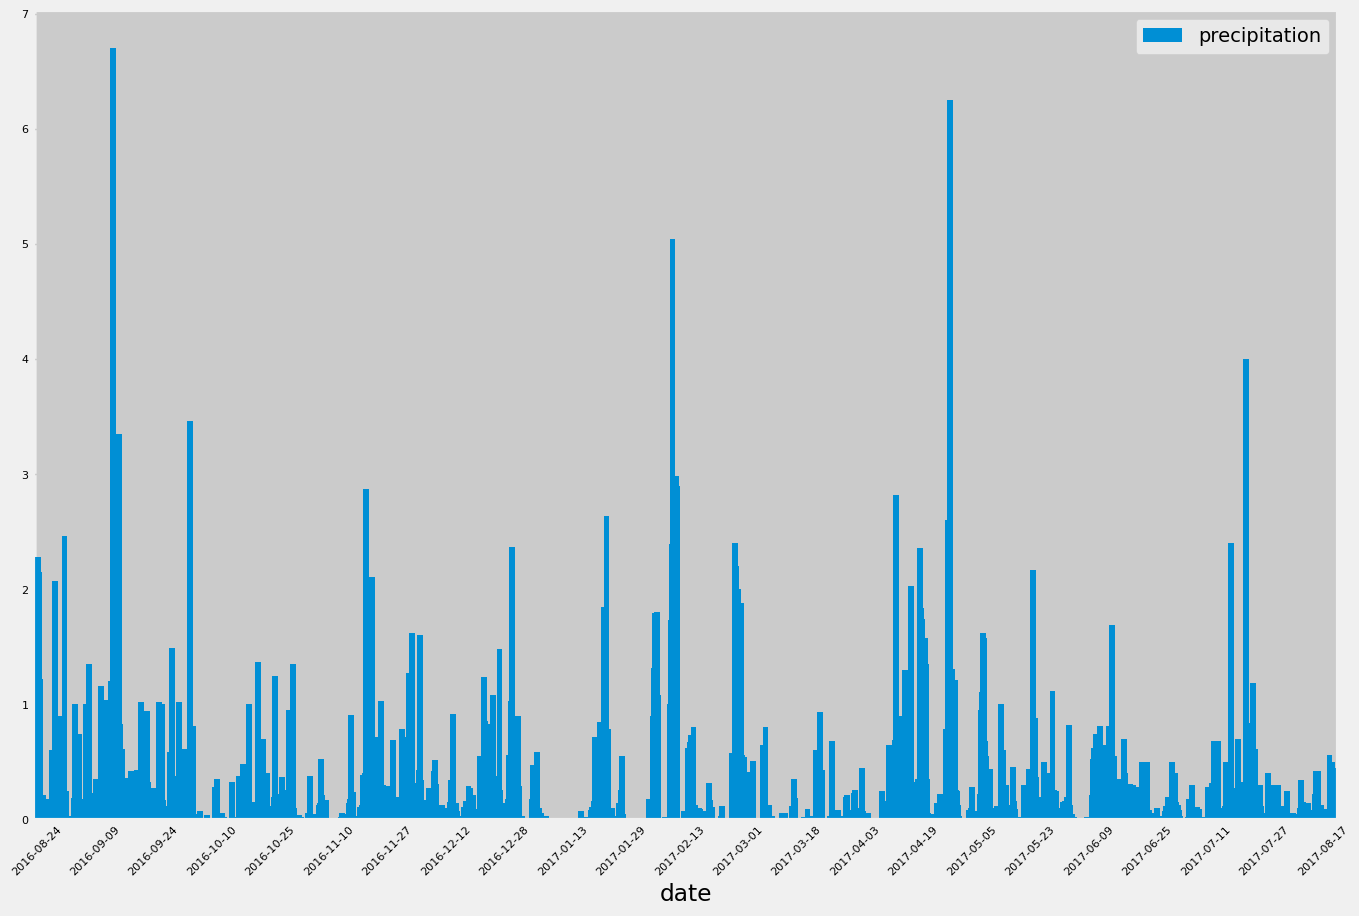

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

from datetime import datetime, timedelta
# Calculate the date one year from the last date in data set.
time_delta = timedelta(days=365)
recent_date = datetime.strptime('2017-08-23', '%Y-%m-%d')
oneYearBefore_date = recent_date - time_delta

# Perform a query to retrieve the data and precipitation scores
rec_oneYear_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date <= recent_date).\
    filter(measurement.date > oneYearBefore_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
df_oneYear = pd.DataFrame(rec_oneYear_data).sort_values('date', ascending = True)
df_oneYear.rename(columns = {'prcp':'precipitation'}, inplace = True) 

# Use Pandas Plotting with Matplotlib to plot the data

ax = df_oneYear.plot(x='date', y='precipitation', stacked=True, width=10, kind='bar',figsize=(15,10), legend=True, fontsize=8, rot=45)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%100 != 0:
        tick.label1.set_visible(False)

plt.show()


In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_oneYear.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [84]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count((station.name)))

print(station_count.scalar())

9


In [83]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

stationList = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stationList


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [91]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_tobs = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281')    

df_tobs = pd.DataFrame(most_active_station_tobs)
df_tobs.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


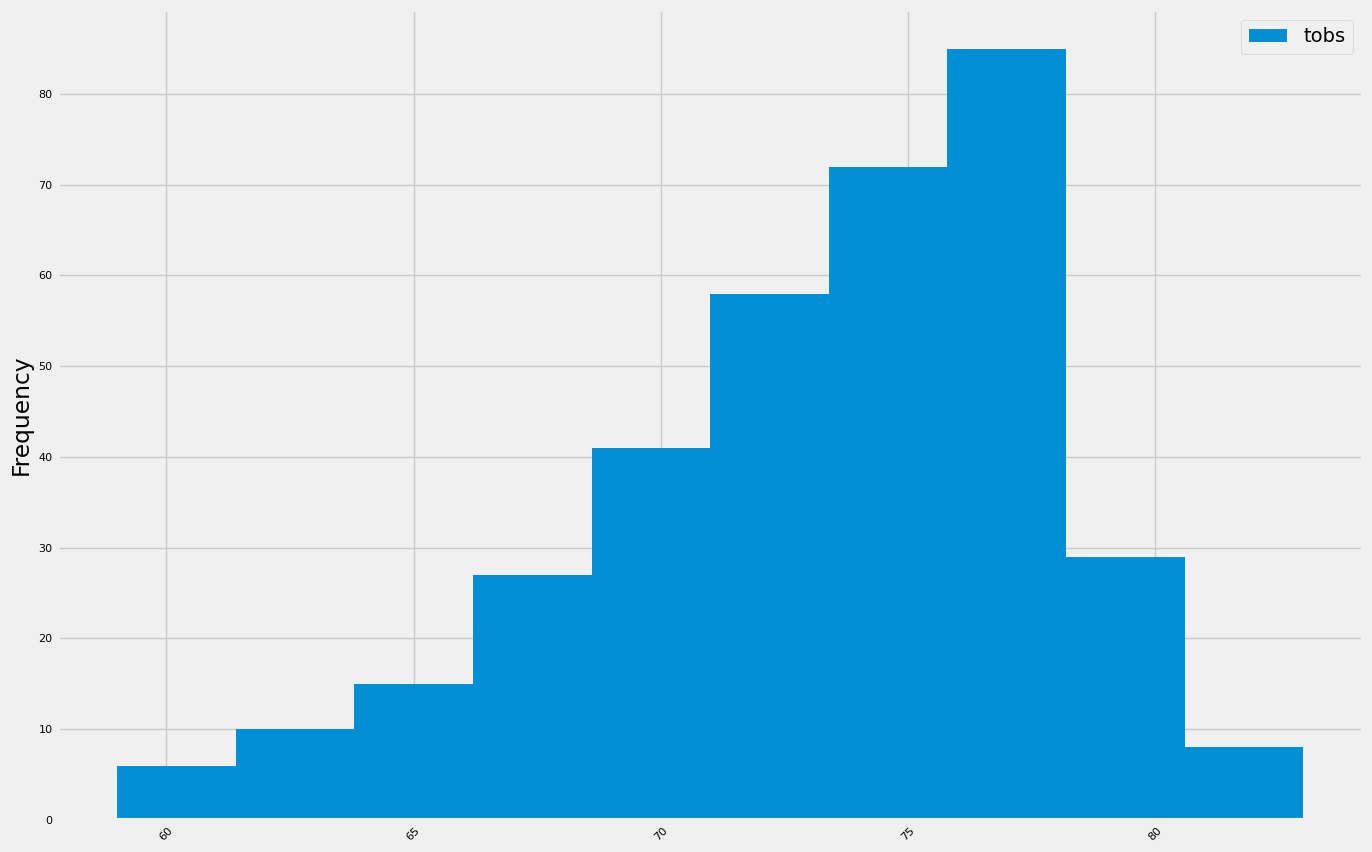

In [106]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date <= recent_date).\
    filter(measurement.date > oneYearBefore_date).all()


df_tobs = pd.DataFrame(tobs_data)

# Use Pandas Plotting with Matplotlib to plot the data
ax = df_tobs.plot(kind='hist',figsize=(15,10), legend=True, fontsize=8, rot=45)
plt.show()


# Close Session

In [17]:
# Close Session
session.close()